# Problem Set 11 (Extra Credit)
## Michael Rogers

### Q1a.

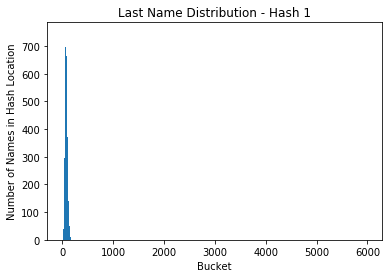

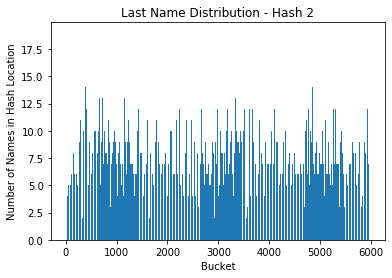

In [2]:
import matplotlib.pyplot as plt
import random as rd

# h1(x)
def h1_hash_index(name, location):
    hash = 0
    for char in name:
        #Hashing each character to it's appropriate location in the distribution.
        hash += ord(char) - 65 + 1
        hash = hash % location
    return hash

# h2(x)
def h2_hash_index(name, location):
    hash = 0
    for char in name:
        x_i = (ord(char) - 65 + 1)
        a_i = rd.randint(0, location)
        hash = hash + (x_i * a_i)
        hash = hash % location
    return hash

# Number of buckets
l = 5987

# Create name list with names randomly suffled
names = []

with open("dist.all.last.txt") as file:
    for line in file:
        name = line.split()[0]
        names.append(name)

rand_indicies = rd.sample(range(len(names)), len(names) // 2)
names = [names[i] for i in rand_indicies]

# Fill the hash1 dictionary
hash1 = {x:0 for x in range(0, l)}

for name in names:
    hash_value = h1_hash_index(name, l)
    hash1[hash_value] += 1

hash1_lst = []

for key in sorted(hash1.keys()):
    hash1_lst.append(hash1[key])

# Plot hash1
b = range(0,l)
plt.bar(b, hash1_lst)
plt.title("Last Name Distribution - Hash 1")
plt.xlabel("Bucket")
plt.ylabel("Number of Names in Hash Location")
plt.show()

# Fill the hash2 dictionary
hash2 = {x:0 for x in range(0, l)}

for name in names:
    hash_value = h2_hash_index(name, l)
    hash2[hash_value] += 1

hash2_lst = []

for key in sorted(hash2.keys()):
    hash2_lst.append(hash2[key])

# Plot hash2
b = range(0,l)
plt.bar(b, hash2_lst)
plt.title("Last Name Distribution - Hash 2")
plt.xlabel("Bucket")
plt.ylabel("Number of Names in Hash Location")
plt.show()

### Q1c.

5987


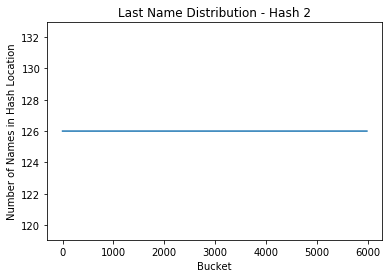

In [25]:
max1bin = []

# Function to find max in each bucket n 
def max_in_bucket1(hash_lst):
    maxnum = 0
    for i in range(l):
        if hash_lst[i] > maxnum:
            maxnum = len(list(hash_lst.keys())[0:i])
    max1bin.append(maxnum)   

# Run above function for all names in list
for name in names:
    max_in_bucket1(hash1)

if len(max1bin) > l:
    max1bin = max1bin[0:l]
print(len(max1bin))
    
# Plotting
plt.plot([x for x in range(l)], max1bin)
plt.title("Longest Chain vs. n - Hash 1")
plt.xlabel("Element n")
plt.ylabel("Chain length")
plt.show()

### Q1d.

5987


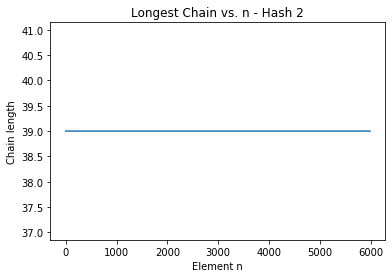

In [27]:
max2bin = []

# Function to find max in each bucket n
def max_in_bucket2(hash_lst):
    maxnum = 0
    for i in range(l):
        if hash_lst[i] > maxnum:
            maxnum = len(list(hash_lst.keys())[0:i])
    max2bin.append(maxnum)

# Run above function for all names in list
for name in names:
    max_in_bucket2(hash2)
    
if len(max2bin) > l:
    max2bin = max2bin[0:l]
print(len(max2bin))

# Plotting
plt.plot([x for x in range(l)], max2bin)
plt.title("Longest Chain vs. n - Hash 2")
plt.xlabel("Element n")
plt.ylabel("Chain length")
plt.show()